In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import missingno

df = pd.read_csv('final_data_19_20.csv', parse_dates=['From Date'], dayfirst=True)
df.loc[df['From Date'].dt.month == 1, ['season'] ] = 1
df.loc[df['From Date'].dt.month == 2, ['season'] ] = 1
df.loc[df['From Date'].dt.month == 3, ['season'] ] = 2
df.loc[df['From Date'].dt.month == 4, ['season'] ] = 2
df.loc[df['From Date'].dt.month == 5, ['season'] ] = 2
df.loc[df['From Date'].dt.month == 6, ['season'] ] = 2
df.loc[df['From Date'].dt.month == 7, ['season'] ] = 3
df.loc[df['From Date'].dt.month == 8, ['season'] ] = 3
df.loc[df['From Date'].dt.month == 9, ['season'] ] = 3
df.loc[df['From Date'].dt.month == 10, ['season'] ] = 3
df.loc[df['From Date'].dt.month == 11, ['season'] ] = 1
df.loc[df['From Date'].dt.month == 12, ['season'] ] = 1
doi = df.iloc[:, 2:]
doi['year'] = doi['From Date'].dt.year
doi = doi[doi.isna().any(axis = 1)== False]
doi = doi.drop(doi[doi['PM2.5']>500].index)
doi = doi.reset_index(drop=True)

In [2]:
cols = ['PM2.5' ,'RH', 'WS', 'SR', 'BP', 'NO2','NOx', 'SO2', 'CO', 'Ozone','NH3' ,'AOD47','ColumnWV','station id', 'month', 'year','From Date', 'season']
dfn = doi[cols]

In [3]:
dfn.head()
dfnn = dfn.groupby('From Date').mean()

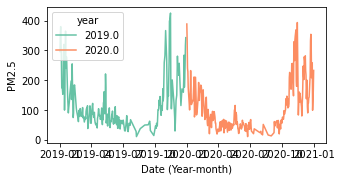

In [4]:

plt.figure(figsize = (5,2.5))
plt.xlabel('Date (Year-month)')
sns.lineplot(x = 'From Date', y = 'PM2.5', data=dfnn, hue='year', palette=sns.color_palette("Set2", 2))


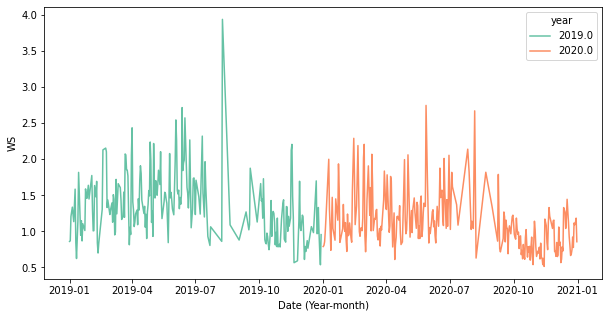

In [5]:
plt.figure(figsize = (10,5))
plt.xlabel('Date (Year-month)')
sns.lineplot(x = 'From Date', y = 'WS', data=dfnn, hue='year', palette=sns.color_palette("Set2", 2))

No handles with labels found to put in legend.


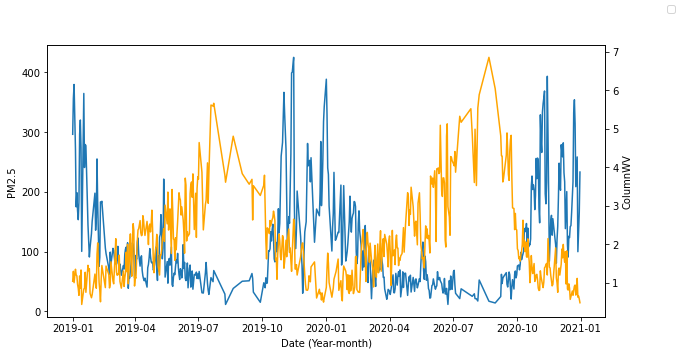

In [6]:
plt.figure(figsize = (10,5))
plt.xlabel('Date (Year-month)')
sns.lineplot(x = 'From Date', y = 'PM2.5', data=dfnn,  palette=sns.color_palette("Set2", 1))
ax2 = plt.twinx()
ax2.figure.legend()
sns.lineplot(x = 'From Date', y = 'ColumnWV', data=dfnn, color = 'orange', palette=sns.color_palette("Set1", 1), ax = ax2)

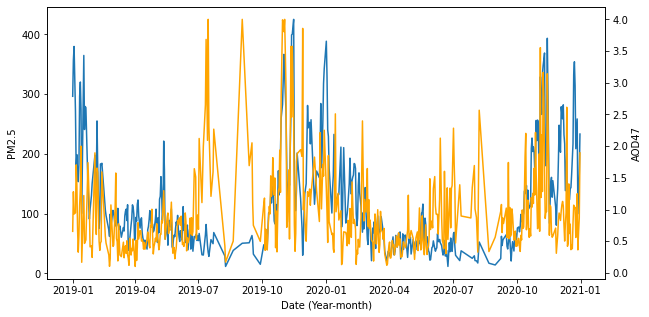

In [7]:
plt.figure(figsize = (10,5))
plt.xlabel('Date (Year-month)')
sns.lineplot(x = 'From Date', y = 'PM2.5', data=dfnn,  palette=sns.color_palette("Set2", 1))
ax2 = plt.twinx()
sns.lineplot(x = 'From Date', y = 'AOD47', data=dfnn, color = 'orange', palette=sns.color_palette("Set1", 1), ax = ax2)

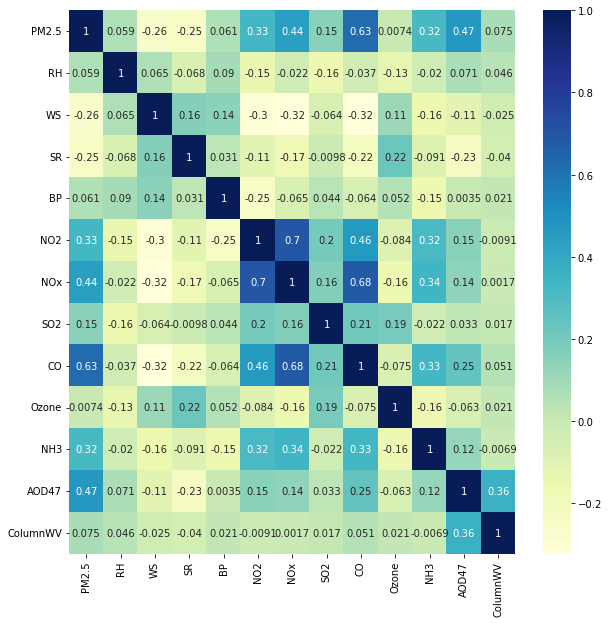

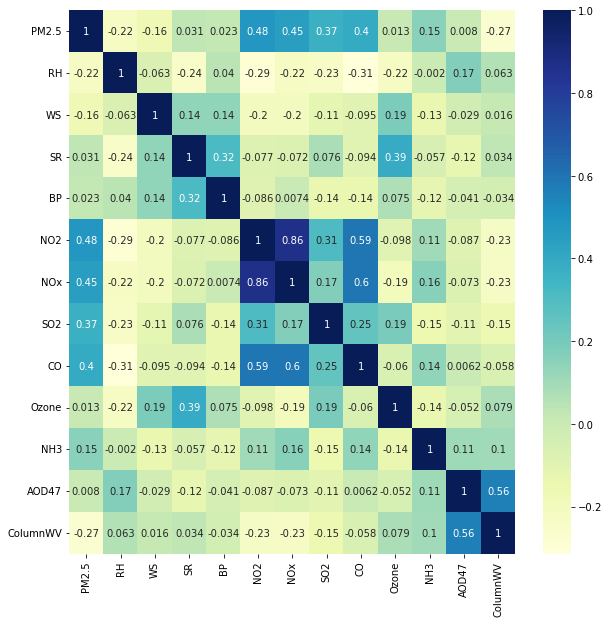

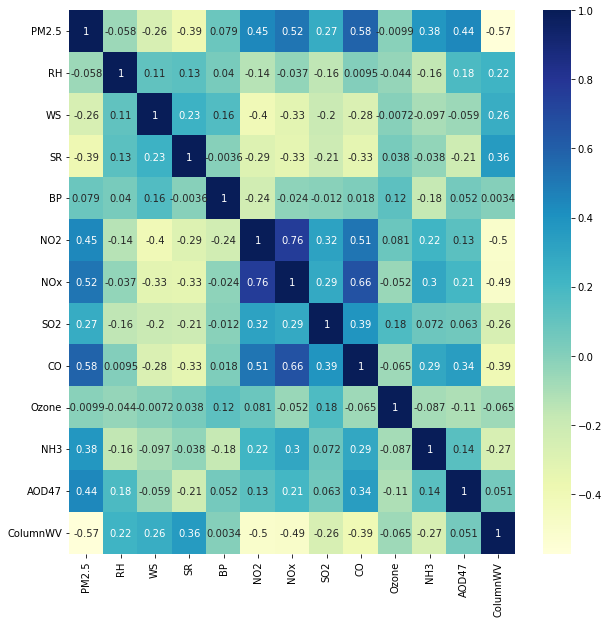

In [8]:

plt.figure(figsize = (10,10))
sns.heatmap(dfn[dfn['season']==1].iloc[:,:-5].corr(), cmap="YlGnBu", annot=True)


plt.figure(figsize = (10,10))
sns.heatmap(dfn[dfn['season']==2].iloc[:,:-5].corr(), cmap="YlGnBu", annot=True)


plt.figure(figsize = (10,10))
sns.heatmap(dfn[dfn['season']==3].iloc[:,:-5].corr(), cmap="YlGnBu", annot=True)


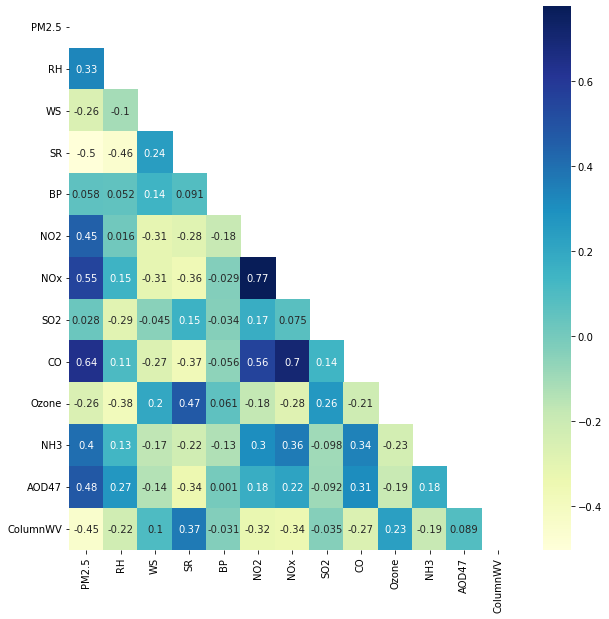

In [9]:
plt.figure(figsize = (10,10))
mask = np.triu(dfn.iloc[:,:-5].corr())
sns.heatmap(dfn.iloc[:,:-5].corr(), cmap="YlGnBu", annot=True, mask=mask)

In [10]:
table = dfn.describe().round(2).iloc[1:, :-2]


In [11]:
dfn.describe()

,PM2.5,RH,WS,SR,BP,NO2,NOx,SO2,CO,Ozone,NH3,AOD47,ColumnWV,station id,month,year,season
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,124.244424,53.554099,1.217087,140.623996,971.452047,50.359831,59.888672,15.815918,1.444156,37.271987,38.598724,0.855326,1.862357,22.467210,6.390720,2019.544734,1.791547
std,88.017714,18.269038,0.862376,60.541448,57.850946,27.994142,49.681828,8.685152,0.806319,21.821005,19.834159,0.661909,0.951668,11.907241,3.795223,0.498023,0.743967
min,8.920000,0.230000,0.130000,2.200000,733.590000,0.650000,0.710000,0.150000,0.000000,0.000000,0.360000,0.019000,0.396000,1.000000,1.000000,2019.000000,1.000000
25%,60.660000,44.180000,0.700000,92.205000,978.930000,29.910000,23.785000,9.900000,0.850000,20.335000,25.710000,0.444750,1.134000,14.000000,3.000000,2019.000000,1.000000
50%,96.830000,57.010000,1.040000,134.500000,986.590000,45.810000,43.770000,14.590000,1.290000,33.760000,34.110000,0.664000,1.679000,24.000000,5.000000,2020.000000,2.000000
75%,160.905000,66.240000,1.430000,189.310000,991.500000,66.010000,80.615000,20.090000,1.850000,50.770000,46.670000,1.044000,2.359000,33.000000,10.000000,2020.000000,2.000000
max,497.410000,94.800000,9.610000,439.340000,1000.220000,246.230000,320.470000,131.370000,6.100000,189.430000,186.260000,4.000000,6.852000,40.000000,12.000000,2020.000000,3.000000


In [12]:
table[['PM2.5', 'AOD47', 'ColumnWV', 'RH', 'WS', 'SR', 'BP', 'NOx','NO2', 'SO2', 'CO', 'Ozone',
       'NH3']].to_csv('latex.csv')